In [311]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 

# QUESTION 3
### Part A)

In [312]:
#Reading Product Sales excel 
product_sales_raw = pd.read_excel("MMA860_Assignment1_Data_vf.xlsx",sheet_name = 'Product_Sales',index_col='Obs')
product_sales_raw.head()

,Product_ID,Sales_2016,Sales_2017,Import,Num_Retailers,Price
Obs,,,,,,
1,1,1162.91,235.19,1,5,$67.18
2,2,1191.11,944.87,1,3,$54.56
3,3,1214.96,737.06,0,5,$58.85
4,4,1336.07,986.15,0,7,$56.48
5,5,1343.29,871.33,1,7,$58.74


In [313]:
#checking initial data types
product_sales_raw.dtypes

Product_ID         int64
Sales_2016       float64
Sales_2017       float64
Import             int64
Num_Retailers      int64
Price             object
dtype: object

In [314]:
# Removing '$' substring to prices and convertting float datatype
product_sales_raw['Price'] = product_sales_raw['Price'].replace('[\$,]', '', regex=True).astype(float)

# Converting Product ID's to String type
product_sales_raw['Product_ID'] = product_sales_raw['Product_ID'].astype(str)

#checking datatypes again 
product_sales_raw.dtypes

Product_ID        object
Sales_2016       float64
Sales_2017       float64
Import             int64
Num_Retailers      int64
Price            float64
dtype: object

In [315]:
# removing duplicates
product_sales_raw.drop_duplicates(inplace=True)

#checking each row value contains a non null value

col_list = list(product_sales_raw)

count_null = []

for col in col_list:
    na_values = product_sales_raw[col].isna().sum()
    
    count_null.append(na)

print(count_null,'\nFrom the above we can determine that each field does not contain any null values')

[0, 0, 0, 0, 0, 0] 
From the above we can determine that each field does not contain any null values


In [316]:
for index,row in product_sales_raw.iterrows():
    
    '''Looping through each Product ID and checking if string length is 1 or 2. 
       If length equals 1 we add '00' to Product ID else if length is 2 add '0' only.
    '''
    
    if len(product_sales_raw.loc[index,'Product_ID']) == 1:
        
        product_sales_raw.loc[index,'Product_ID'] = '00' + product_sales_raw.loc[index,'Product_ID']
        
    elif len(product_sales_raw.loc[index,'Product_ID']) == 2:
        
        product_sales_raw.loc[index,'Product_ID'] = '0' + product_sales_raw.loc[index,'Product_ID']

In [317]:
#checking Product_ID counts/lengths
count = 0
for id in product_sales_raw.Product_ID.tolist():
    if len(id) == 3:
        #print('Error')
        count+= 1
    else:
        print('Error')
print(count,'\nEach Product ID has a fixed length of 3') 


200 
Each Product ID has a fixed length of 3


### Part B)
   

In [318]:
# Using the melt function we change the structure of the dataset to have each row contain only one specific sales year
product_tidy =  product_sales_raw.melt(id_vars=['Product_ID','Import','Num_Retailers','Price'],
                                       value_vars = ['Sales_2016','Sales_2017'],var_name = 'Year',value_name = 'Sales').reset_index()



In [319]:
# Removing 'Sales_' characters from Year column
product_tidy['Year'] = product_tidy['Year'].str.replace('Sales_','')

# Converting year to int date type
product_tidy['Year'] = product_tidy['Year'].astype(np.int64)

#checking duplicates
product_tidy.drop_duplicates(inplace=True)
print(product_tidy.head())
print(product_tidy.dtypes)

   index Product_ID  Import  Num_Retailers  Price  Year    Sales
0      0        001       1              5  67.18  2016  1162.91
1      1        002       1              3  54.56  2016  1191.11
2      2        003       0              5  58.85  2016  1214.96
3      3        004       0              7  56.48  2016  1336.07
4      4        005       1              7  58.74  2016  1343.29
index              int64
Product_ID        object
Import             int64
Num_Retailers      int64
Price            float64
Year               int64
Sales            float64
dtype: object


Product_ID is a string type of fixed length 3 and Import, Num_Retailers, and Year are integer types. \
Price and Sales are floating types since values contain decimal points

### Part C)

In [320]:
#Creating Functions to plot Normal Distribution of Prices
def hist_array(count):    
    
    hmin = np.min(count)
    hmax = np.max(count)
    hr = np.arange(hmin,hmax+1)
    return(hr)

def mean_fn(x):
    
    m1 = np.sum(x)/(np.size(x))
    # print('mean =',m1)
    return(m1)
     
def std_fn(x):
    
    m2 = np.sum(x*x)/(np.size(x))
    std = np.sqrt(m2-(mean_fn(x)*mean_fn(x)))
    print('standard deviation =',std,'mean =',mean_fn(x))
    return(std)

def gaussian_fit(x,mu,sigma):
    
    return (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-0.5*(x-mu)**2/sigma**2)

standard deviation = 10.446622728901449 mean = 52.126599999999996


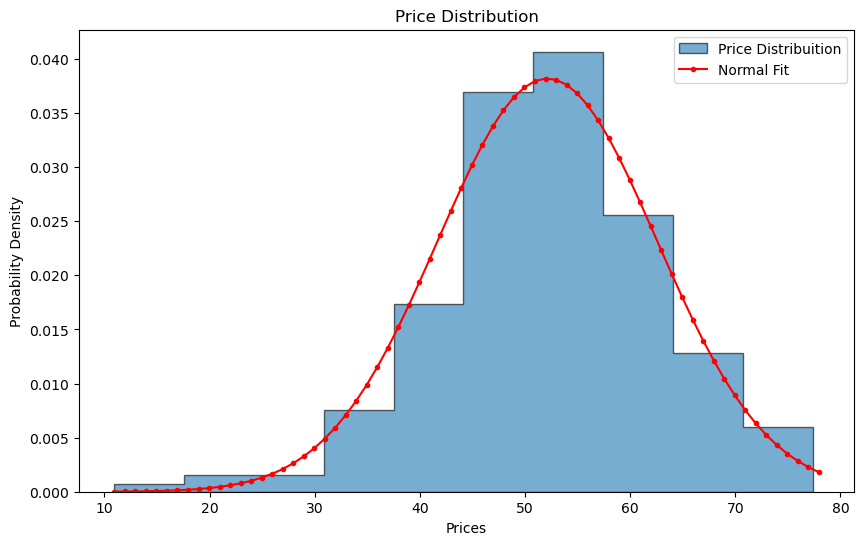

In [321]:
#creating Array for Prices 
prices = product_tidy['Price'].values

#Plotting histogram of Prices and Normal plot of Prices

plt.figure(figsize=(10,6))
plt.hist(prices, label = 'Price Distribuition',density = True,histtype = 'stepfilled',alpha=0.6,edgecolor='black',linewidth=1)
plt.plot(hist_array(prices),gaussian_fit(hist_array(prices),mean_fn(prices),std_fn(prices)),'.-',label = 'Normal Fit',color = 'red')
plt.xlabel('Prices')
plt.ylabel('Probability Density')
plt.title('Price Distribution')
plt.legend()
plt.show()

Prices follow an approximate Normal distribution where the mean Price is centered at 52.13 with a standard deviation of 10.45

### Part D)

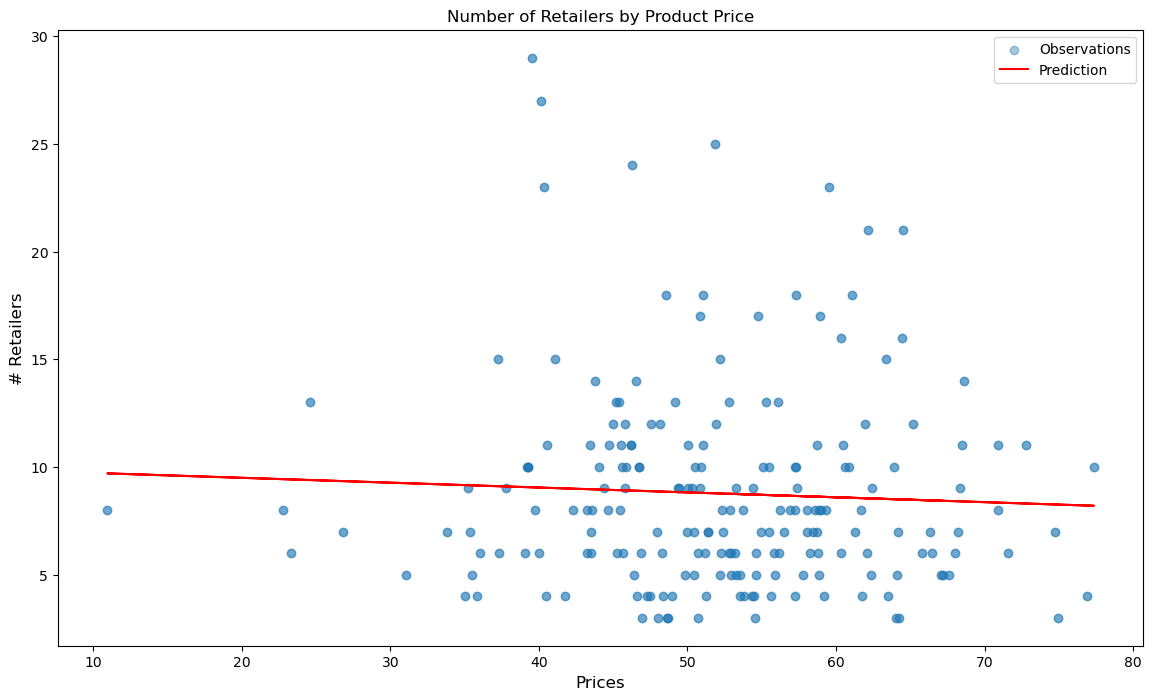

Correlation Coefficient is -0.05023465154459219


In [322]:
#Calculating Correlation Coefficient
coeff = np.corrcoef(prices,retailers)[0,1]

# Fitting to linear regression model
train_X = long['Price'].values.reshape(-1,1)
train_y = long['Num_Retailers'].values
reg = LinearRegression().fit(train_X, train_y)

#Plotting 
plt.figure(figsize=(14,8))
plt.scatter(train_X,train_y,label='Observations',alpha=0.4)
plt.plot(train_X,predicted_y,color='red',label='Prediction')
plt.xlabel('Prices',size=12)
plt.ylabel('# Retailers',size=12)
plt.legend()
plt.title('Number of Retailers by Product Price')
plt.show()

print('Correlation Coefficient is',coeff)

Correlation between Prices and Number of Retailers is -0.050. This implies that there is an inverse relationship between product prices and the Number of retailers. As Prices increase the number of retailers will consequently decrease. However, given the magnituide of the correlation coefficient the strength of relationship is low as shown in the above scatter plot, where it is evident that the model is underfitting against the true values.

### Question 3 C.)

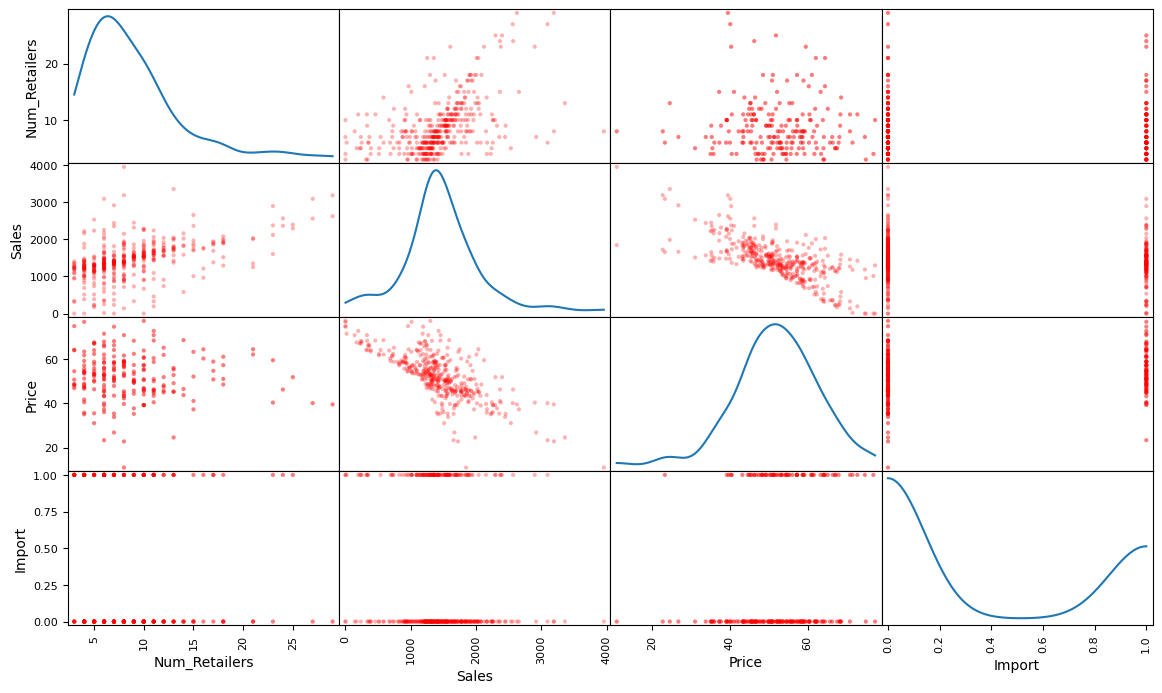

In [323]:
#Generating scatter matrix to identify correlations between all numeric features
pd.plotting.scatter_matrix(product_tidy[['Num_Retailers','Sales','Price','Import']],alpha=0.3,figsize= (14,8),diagonal ='kde',color = 'Red');

From the Matrix scatter plot we can identify strong correlatations between sales vs Number of Retailers and Sales vs Price\
Sales vs Number of retailers show a positive correlation and sales vs price show a negative correlation.
Import shows no clear correlation with sales, price, and number of retailers

### Sales Vs Price:

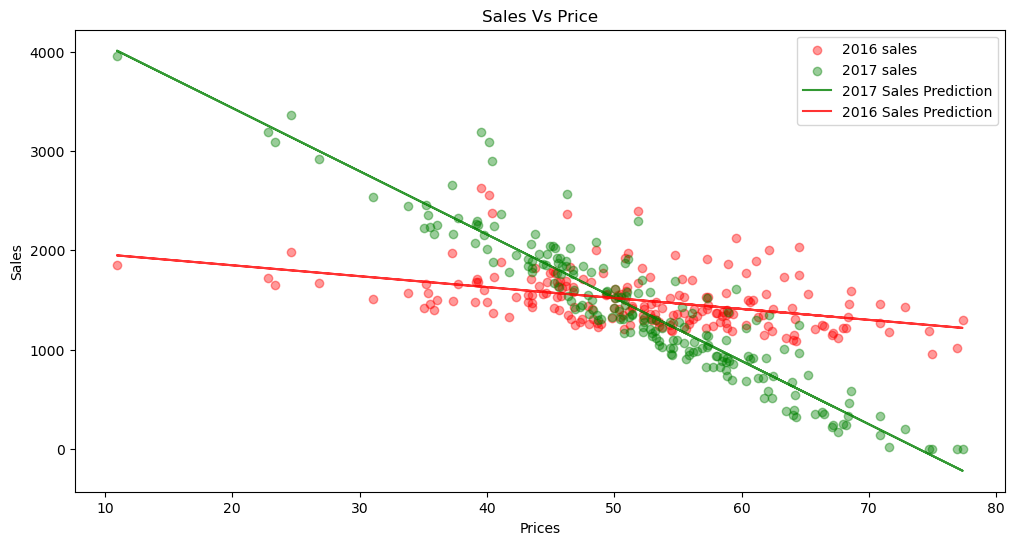

It is evidient that Sales and Prices are negatively correlated
Moreover we can see that the 2017 model has an increased slope compared to the 2016 Model.
This Indicates that sales in 2017 were more sensitive to price changes compared to previous year


In [324]:
#taking a closer look at sales vs price since it showed the strongest correlation in the above matrix

sales_2016 = product_tidy.loc[product_tidy.Year == 2016]['Sales'].values
sales_2017 = product_tidy.loc[product_tidy.Year == 2017]['Sales'].values
prices_2016 = product_tidy.loc[product_tidy.Year == 2016]['Price'].values
prices_2017 = product_tidy.loc[product_tidy.Year == 2017]['Price'].values


# Linear regression model

train_x_2016 = prices_2016.reshape(-1,1)
train_y_2016 = sales_2016

reg_2016 = LinearRegression().fit(train_x_2016, train_y_2016)
predicted_y_2016 = reg_2016.predict(train_x_2016)

train_x_2017 = prices_2017.reshape(-1,1)
train_y_2017 = sales_2017

reg_2017 = LinearRegression().fit(train_x_2017, train_y_2017)
predicted_y_2017 = reg_2017.predict(train_x_2017)



plt.figure(figsize=(12,6))
plt.scatter(prices_2016,sales_2016,label = '2016 sales',color = 'red',alpha=0.4)
plt.scatter(prices_2017,sales_2017,label = '2017 sales',color = 'green',alpha=0.4)
plt.plot(train_x_2017,predicted_y_2017,label = '2017 Sales Prediction',color='green',alpha=0.8)
plt.plot(train_x_2016,predicted_y_2016,label = '2016 Sales Prediction',color='red',alpha=0.8)
plt.xlabel('Prices')
plt.ylabel('Sales')
plt.title('Sales Vs Price')
plt.legend()
plt.show()

print('It is evidient that Sales and Prices are negatively correlated\nMoreover we can see that the 2017 model has an increased slope compared to the 2016 Model.\nThis Indicates that sales in 2017 were more sensitive to price changes compared to previous year')

### Sales Vs Number of Retailers:

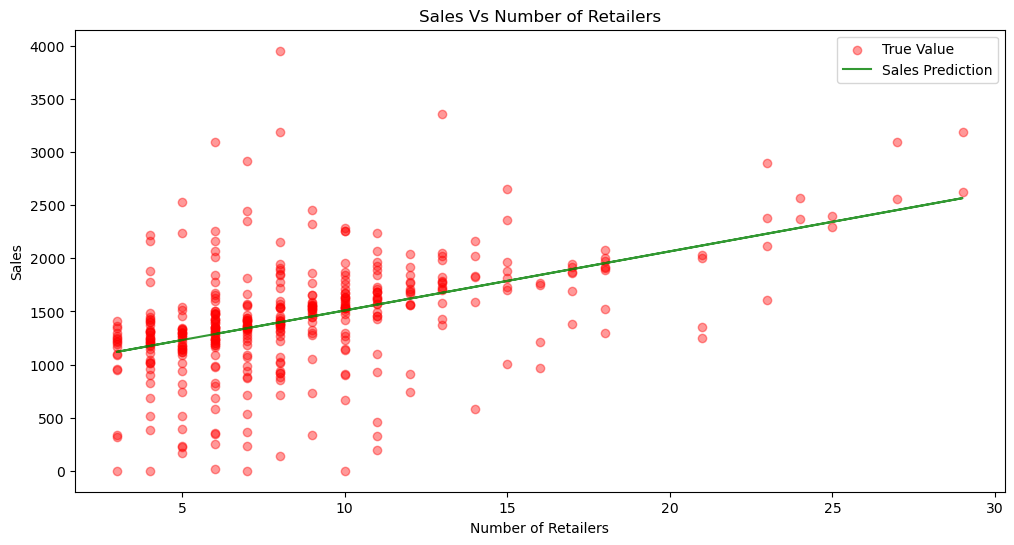

In [325]:
# Creating training data for linear regression model
Train_x_retailers = product_tidy.Num_Retailers.values.reshape(-1,1)
Train_y_sales = product_tidy.Sales.values

# Running Regression
reg_sales_retailers = LinearRegression().fit(Train_x_retailers, Train_y_sales)
predicted_y_sales_retailers = reg_sales_retailers.predict(Train_x_retailers)
# Plotting results

plt.figure(figsize=(12,6))
plt.scatter(Train_x_retailers,Train_y_sales,label = 'True Value',color = 'red',alpha=0.4)
#plt.scatter(prices_2017,sales_2017,label = '2017 sales',color = 'green',alpha=0.4)
plt.plot(Train_x_retailers,predicted_y_sales_retailers,label = 'Sales Prediction',color='green',alpha=0.8)
#plt.plot(train_x_2016,predicted_y_2016,label = '2016 Sales Prediction',color='red',alpha=0.8)
plt.xlabel('Number of Retailers')
plt.ylabel('Sales')
plt.title('Sales Vs Number of Retailers')
plt.legend()
plt.show()